In [ ]:
### Lipophilicty predictor: GCNN, random train/validate/test splits, representation = ConvMol object (from Deepchem)

In [1]:
###load data from CSV in same folder as notebook
from deepchem.utils.save import load_from_disk
dataset_file= "./lipophilicity.csv"
dataset = load_from_disk(dataset_file)
print("Columns of dataset: %s" % str(dataset.columns.values))
print("Number of examples in dataset: %s" % str(dataset.shape[0]))

Columns of dataset: ['CMPD_CHEMBLID' 'exp' 'smiles']
Number of examples in dataset: 4200


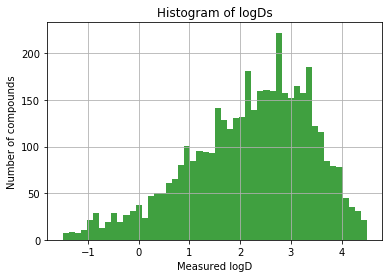

In [2]:
###plot histogram of data to show distribution
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

logDs = np.array(dataset["exp"])
n, bins, patches = plt.hist(logDs, 50, facecolor='green', alpha=0.75)
plt.xlabel('Measured logD')
plt.ylabel('Number of compounds')
plt.title(r'Histogram of logDs')
plt.grid(True)
plt.show()

In [3]:
###featurize the data using ConvMols
import deepchem as dc
featurizer = dc.feat.ConvMolFeaturizer()
loader = dc.data.CSVLoader(tasks=["exp"], smiles_field="smiles",featurizer=featurizer)
dataset = loader.featurize(dataset_file)

Loading raw samples now.
shard_size: 8192
About to start loading CSV from ./lipophilicity.csv
Loading shard 1 of size 8192.
Featurizing sample 0
Featurizing sample 1000
Featurizing sample 2000
Featurizing sample 3000
Featurizing sample 4000
TIMING: featurizing shard 0 took 15.727 s
TIMING: dataset construction took 18.975 s
Loading dataset from disk.


In [4]:
###randomly split data into train, validation, and test sets
splitter = dc.splits.RandomSplitter(dataset_file)
train_dataset, valid_dataset, test_dataset = splitter.train_valid_test_split(dataset, seed=0)

Computing train/valid/test indices
TIMING: dataset construction took 4.212 s
Loading dataset from disk.
TIMING: dataset construction took 2.224 s
Loading dataset from disk.
TIMING: dataset construction took 2.034 s
Loading dataset from disk.


In [5]:
###normalize all datasets
transformers = [dc.trans.NormalizationTransformer(transform_y=True, dataset=train_dataset)]

for dataset in [train_dataset, valid_dataset, test_dataset]:
  for transformer in transformers:
      dataset = transformer.transform(dataset)

TIMING: dataset construction took 3.776 s
Loading dataset from disk.
TIMING: dataset construction took 0.505 s
Loading dataset from disk.
TIMING: dataset construction took 0.452 s
Loading dataset from disk.


In [14]:
###fit the model to the data
from deepchem.models.tensorgraph.models.graph_models import GraphConvModel
model = GraphConvModel(n_tasks=1, mode='regression', batch_size=50, model_dir="./models/logD", random_seed=0)

# Set nb_epoch=10 for better results <= from tutorial
model.fit(train_dataset, nb_epoch=30, deterministic=True)

C:\Users\darne\Anaconda3\lib\site-packages\tensorflow\python\ops\gradients_impl.py:110: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Ending global_step 999: Average loss 0.660396
Ending global_step 1999: Average loss 0.263167
Ending global_step 2040: Average loss 0.194387
TIMING: model fitting took 237.300 s


0.1943872447420911

computed_metrics: [0.878215293338148]
{'r2_score': 0.878215293338148}


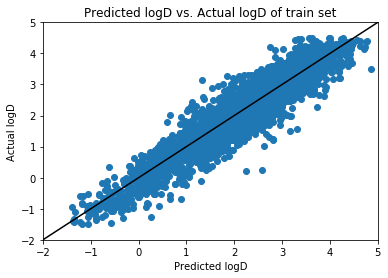

In [16]:
###evaluate the model's performance on train set
from deepchem.utils.evaluate import Evaluator
metric = dc.metrics.Metric(dc.metrics.r2_score)
evaluator = Evaluator(model, train_dataset, transformers)
r2score = evaluator.compute_model_performance([metric])
print(r2score)

### plot of train vs predicted train
rf_predicted_train = model.predict(train_dataset)
rf_true_train = train_dataset.y
plt.scatter(rf_predicted_train, rf_true_train)
plt.xlabel('Predicted logD')
plt.ylabel('Actual logD')
plt.title(r'Predicted logD vs. Actual logD of train set')
plt.xlim([-2,5])
plt.ylim([-2,5])
plt.plot([-2,5], [-2,5], color='k')
plt.show()

computed_metrics: [0.6655180707152021]
{'r2_score': 0.6655180707152021}


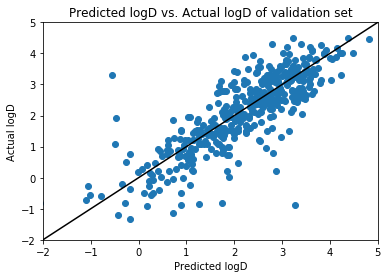

In [17]:
###evaluate the model's performance on validation set
from deepchem.utils.evaluate import Evaluator
metric = dc.metrics.Metric(dc.metrics.r2_score)
evaluator = Evaluator(model, valid_dataset, transformers)
r2score = evaluator.compute_model_performance([metric])
print(r2score)

### plot of train vs predicted train
rf_predicted_valid = model.predict(valid_dataset)
rf_true_valid = valid_dataset.y
plt.scatter(rf_predicted_valid, rf_true_valid)
plt.xlabel('Predicted logD')
plt.ylabel('Actual logD')
plt.title(r'Predicted logD vs. Actual logD of validation set')
plt.xlim([-2,5])
plt.ylim([-2,5])
plt.plot([-2,5], [-2,5], color='k')
plt.show()

computed_metrics: [0.6283488283070098]
{'r2_score': 0.6283488283070098}


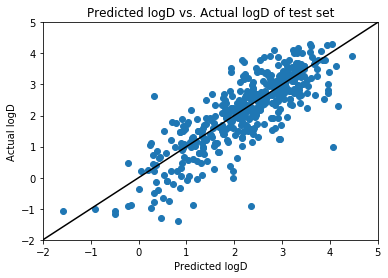

In [18]:
###evaluate the model's performance on test set
from deepchem.utils.evaluate import Evaluator
metric = dc.metrics.Metric(dc.metrics.r2_score)
evaluator = Evaluator(model, test_dataset, transformers)
r2score = evaluator.compute_model_performance([metric])
print(r2score)

### plot of train vs predicted train
rf_predicted_test = model.predict(test_dataset)
rf_true_test = test_dataset.y
plt.scatter(rf_predicted_test, rf_true_test)
plt.xlabel('Predicted logD')
plt.ylabel('Actual logD')
plt.title(r'Predicted logD vs. Actual logD of test set')
plt.xlim([-2,5])
plt.ylim([-2,5])
plt.plot([-2,5], [-2,5], color='k')
plt.show()